### 1. Installed.

### 2. Imported.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [10]:
df_movies=pd.read_csv(r"P:\CarrerFoundy\Data Immersion (deep learning)\Exercise 6\Execrise 6.1\Clean Data Set\Movies.csv")

### 3. Cleaned.

### 4. Scatterplot for visual the relationship between Budget and Gross Revenue.

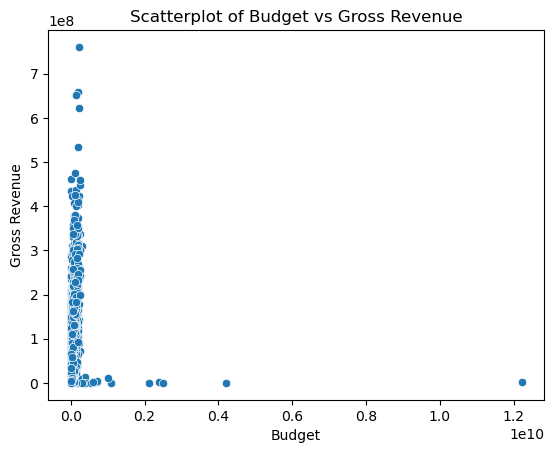

In [36]:
# Assuming df_movies is your DataFrame
# Let's visualize the relationship between 'budget' and 'Gross Revenue'
sns.scatterplot(x='Budget', y='Gross Revenue', data=df_movies)

# Adding labels and title
plt.title('Scatterplot of Budget vs Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')

# Show the plot
plt.show()

### 5. Hypothesis
### H₀: Movie budget does not significantly affect gross revenue.
### H₁: Movie budget significantly affects gross revenue.

### 6. Reshaped the variables into NumPy arrays.

In [24]:
# Reshape 'Budget' (independent variable) into a 2D array
X = df_movies['Budget'].values.reshape(-1, 1)  # Reshaping to a 2D array (n_samples, 1)

# Reshape 'Duration (min)' (dependent variable) into a 1D array
y = df_movies['Gross Revenue'].values.reshape(-1)  # Reshaping to a 1D array (n_samples,)

# Check the shapes of the arrays
print(X.shape)  # Should be (n_samples, 1)
print(y.shape)  # Should be (n_samples,)

(3725, 1)
(3725,)


### 7. Splited the data.

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the size of the resulting sets
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 2980
Test set size: 745


### 8. linear regression.

In [30]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Create predictions for the test set
y_pred = model.predict(X_test)

# Check the model's performance using Mean Squared Error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the results
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 6670950695252852.0
R^2 Score: -0.4873519233384296


### 9. Created a plot.

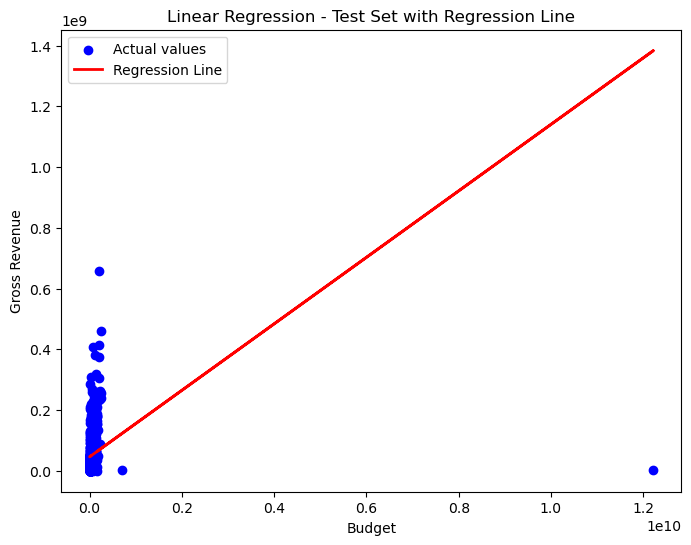

In [34]:
# Create a scatter plot of the test set (actual values vs predicted values)
plt.figure(figsize=(8, 6))

# Plot actual values as scatter points
plt.scatter(X_test, y_test, color='blue', label='Actual values')

# Plot the regression line (predicted values)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

# Adding labels and title
plt.title('Linear Regression - Test Set with Regression Line')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.legend()

# Show the plot
plt.show()

### 10. The regression line visually represents the relationship between the independent variable (Budget) and the dependent variable Gross Revenue. Outliers: Any data points that are far from the regression line (outliers) can adversely affect the model's performance and should be investigated further.

### 11. Mean Squared Error (MSE): The MSE is 6670950695252852.0, a very high value. This indicates that the model's predictions are far from the actual values on average, and the error is substantial. A high MSE suggests the model does not fit the data well.

### R² Score: The R² score is -0.4873519233384296, which is negative. This indicates that the model performs worse than a simple horizontal line (mean of the dependent variable) predicting the data.

### 12. Compared the predicted y values with the actual y values in a dataframe

In [52]:
# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Residual': y_test - y_pred  # Calculate residuals (errors)
})

# Display the first few rows of the DataFrame
print(comparison_df.head())

      Actual     Predicted      Residual
0   88246220  6.492306e+07  2.332316e+07
1  234903076  6.930199e+07  1.656011e+08
2   20991497  4.981574e+07 -2.882424e+07
3   73023275  4.959679e+07  2.342648e+07
4   66790248  5.069153e+07  1.609872e+07


### 13.  Model Performance: The model performed poorly on the test set, with a high MSE and a negative R² score, indicating it fails to capture the relationship between Budget and Gross Revenue. Large residuals further highlight significant prediction errors.

### Data Bias: Possible data bias, such as unrepresentative samples, feature selection, or the presence of outliers, may have impacted the results. Addressing these biases and exploring additional features or non-linear relationships could improve the model's accuracy and reliability.